# statsmodels

`statsmodel` is another statistical library you may use to get more information on your regression models. Let's take a look at how to do some simple things with this API. Below, we create functions to get data for regression and classification.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
import numpy as np
import pandas as pd

np.random.seed(37)
plt.style.use('ggplot')

def get_regression_data(n_features=5, n_samples=1000):
    X, y = make_regression(**{
        'n_samples': n_samples,
        'n_features': n_features,
        'n_informative': n_features,
        'n_targets': 1,
        'bias': 5.3,
        'random_state': 37
    })

    data = np.hstack([X, y.reshape(-1, 1)])
    cols = [f'x{i}' for i in range(n_features)] + ['y']
    return pd.DataFrame(data, columns=cols)

def get_classification_data(n_features=5, n_samples=1000):    
    X, y = make_classification(**{
        'n_samples': n_samples,
        'n_features': n_features,
        'n_informative': n_features,
        'n_redundant': 0,
        'n_repeated': 0,
        'n_classes': 2,
        'n_clusters_per_class': 1,
        'random_state': 37
    })

    data = np.hstack([X, y.reshape(-1, 1)])
    cols = [f'x{i}' for i in range(n_features)] + ['y']
    return pd.DataFrame(data, columns=cols)

## Ordinary least square

An ordinary least square (OLS) model is created using the `OLS()` function. Below, the `patsy` API is used to separate the dataframe using `R` style equation syntax.

In [2]:
import statsmodels.api as sm
from patsy import dmatrices

df = get_regression_data()
y, X = dmatrices('y ~ x0 + x1 + x2 + x3 + x4', data=df, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()

You can also bypass `patsy` and use the `formula` API to define the model.

In [3]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='y ~ x0 + x1 + x2 + x3 + x4', data=df)
res = mod.fit()

The summary of the data is available through `summary()`.

In [4]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.399e+32
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:09:02   Log-Likelihood:                 29657.
No. Observations:                1000   AIC:                        -5.930e+04
Df Residuals:                     994   BIC:                        -5.927e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3000   1.01e-15   5.23e+15      0.000       5.300       5.300
x0            41.8134   1.02e-15    4.1e+16      0.000      41.813      41.813
x1            25.0388   1.08e-15   2.33e+16      0.000      25.039      25.039
x2             3.2108   1.02e-15   3.14e+15      0.000       3.211       3.211
x3            29.9942   1.01e-15   2.98e+16      0.000      29.994      29.994
x4            25.3606      1e-15   2.53e+16      0.000      25.361      25.361
==============================================================================
Omnibus:                        7.219   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.934
Skew:                           0.086   Prob(JB):                       0.0115
Kurtosis:                       3.430   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The `params` properties of the results will retrieve the coefficients of the model.

In [5]:
res.params

Intercept     5.300000
x0           41.813417
x1           25.038808
x2            3.210812
x3           29.994205
x4           25.360629
dtype: float64

The `rsquared` property will retrieve the $R^2$ value.

In [6]:
res.rsquared

1.0

There are a lot of model [diagnostic functions](https://www.statsmodels.org/stable/stats.html#residual-diagnostics-and-specification-tests) available. Below, we apply the [rainbow test for linearity](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.linear_rainbow.html#statsmodels.stats.diagnostic.linear_rainbow).

In [7]:
f_stats, p_value = sm.stats.linear_rainbow(res)
print(f'f-statistic: {f_stats:.5f}, p-value: {p_value:.5f}')

f-statistic: 0.24804, p-value: 1.00000


## Logistic regression

Logistic regression is a type of [generalized linear model](https://www.statsmodels.org/stable/glm.html). A logistic regression model is created using the `GLM()` function. Note that `y` comes before `X` for `GLM()`, as opposed to `X` coming before `y` when using `OLS()`.

In [8]:
df = get_classification_data()
y, X = dmatrices('y ~ x0 + x1 + x2 + x3 + x4', data=df, return_type='dataframe')
binonmial_model = sm.GLM(y, X, family=sm.families.Binomial())
res = binonmial_model.fit()

In [9]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      994
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76.314
Date:                Tue, 01 Dec 2020   Deviance:                       152.63
Time:                        17:09:02   Pearson chi2:                 9.15e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5205      0.636     -2.389      0.017      -2.768      -0.273
x0             2.2090      0.259      8.522      0.000       1.701       2.717
x1            -3.1632      0.348     -9.083      0.000      -3.846      -2.481
x2             2.0077      0.248      8.095      0.000       1.522       2.494
x3            -1.0259      0.301     -3.408      0.001      -1.616      -0.436
x4             2.6748      0.382      7.010      0.000       1.927       3.423
==============================================================================
"""

## ANOVA

Analysis of Variance (ANOVA) may be conducted. The data below is taken from [here](https://reneshbedre.github.io/blog/anova.html).

In [10]:
df = pd.DataFrame({
    'A': [25, 30, 28, 36, 29],
    'B': [45, 55, 29, 56, 40],
    'C': [30, 29, 33, 37, 27],
    'D': [54, 60, 51, 62, 73]
})
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


Let's do some box plots.

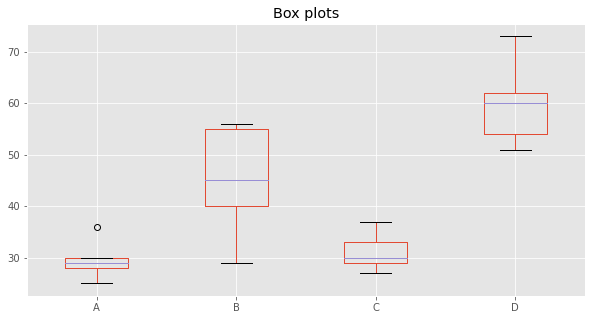

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = df.plot(kind='box', ax=ax)
_ = ax.set_title('Box plots')

`scipy` can do the one-way ANOVA.

In [12]:
import scipy.stats as stats

f, p = stats.f_oneway(*[df[c] for c in df.columns])
print(f'f-statistics: {f:.5f}, p-value: {p:.5f}')

f-statistics: 17.49281, p-value: 0.00003


Before statsmodel can do ANOVA, we have to melt the dataframe.

In [13]:
ldf = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])\
    .rename(columns={'index': 'index', 'variable': 'treatment', 'value': 'value'})
ldf.head()

,index,treatment,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29


Now we specify the ANOVA model and acquire the table.

In [14]:
anova_model = smf.ols('value ~ C(treatment)', data=ldf).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatment),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


Post-hoc testing is also possible.

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

res = pairwise_tukeyhsd(ldf.value, ldf.treatment)
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,15.4,0.0251,1.6929,29.1071,True
A,C,1.6,0.9,-12.1071,15.3071,False
A,D,30.4,0.001,16.6929,44.1071,True
B,C,-13.8,0.0482,-27.5071,-0.0929,True
B,D,15.0,0.0296,1.2929,28.7071,True
C,D,28.8,0.001,15.0929,42.5071,True
